In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.loc[df['fraud_reported']== " "]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.drop(["_c39"],axis=1,inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


<AxesSubplot:>

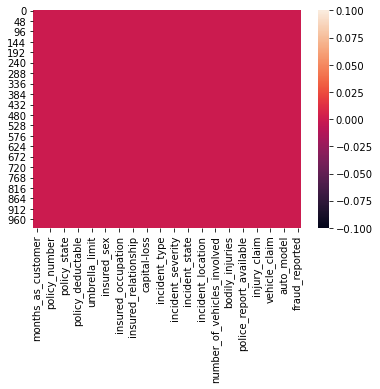

In [10]:
sn.heatmap(df.isnull())

# Visualization of Data

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64


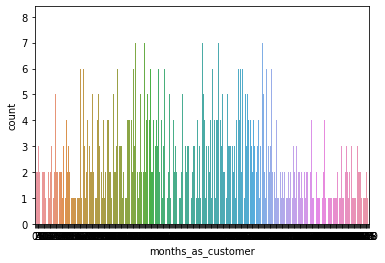

In [12]:
ax = sn.countplot(x="months_as_customer", data=df)
print(df["months_as_customer"].value_counts())

max number of  customer are for 194 month 

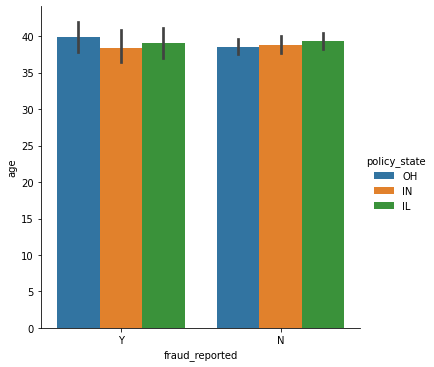

In [13]:
g=sn.catplot(x="fraud_reported",y="age",hue="policy_state",data=df,kind="bar")
plt.show()

In all state between 35-40 age fraud reported most

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


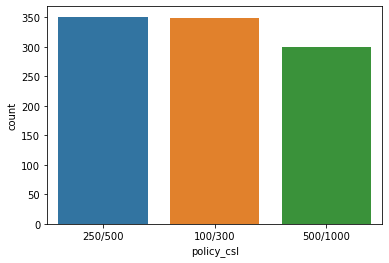

In [14]:
ax = sn.countplot(x="policy_csl", data=df)
print(df["policy_csl"].value_counts())

total number of 250/500 policy csl is 351 , 100/300 is 349 and 500/1000 is 300

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


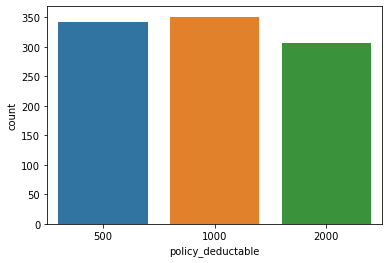

In [15]:
ax = sn.countplot(x="policy_deductable", data=df)
print(df["policy_deductable"].value_counts())

total number of 100 policy deductable is 351 , 500 is 342 and 2000 is 307

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


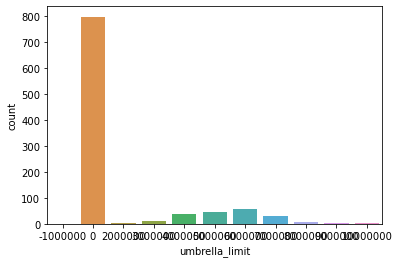

In [16]:
ax = sn.countplot(x="umbrella_limit", data=df)
print(df["umbrella_limit"].value_counts())

Most number of customer has 0 umbrella limit

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


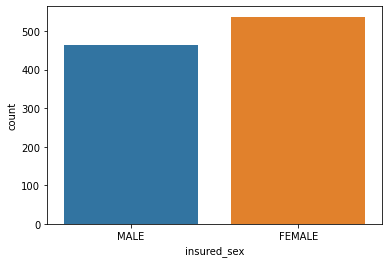

In [17]:
ax = sn.countplot(x="insured_sex", data=df)
print(df["insured_sex"].value_counts())

Total female are 537 and male are 463

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


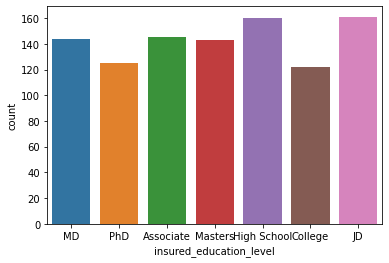

In [18]:
ax = sn.countplot(x="insured_education_level", data=df)
print(df["insured_education_level"].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


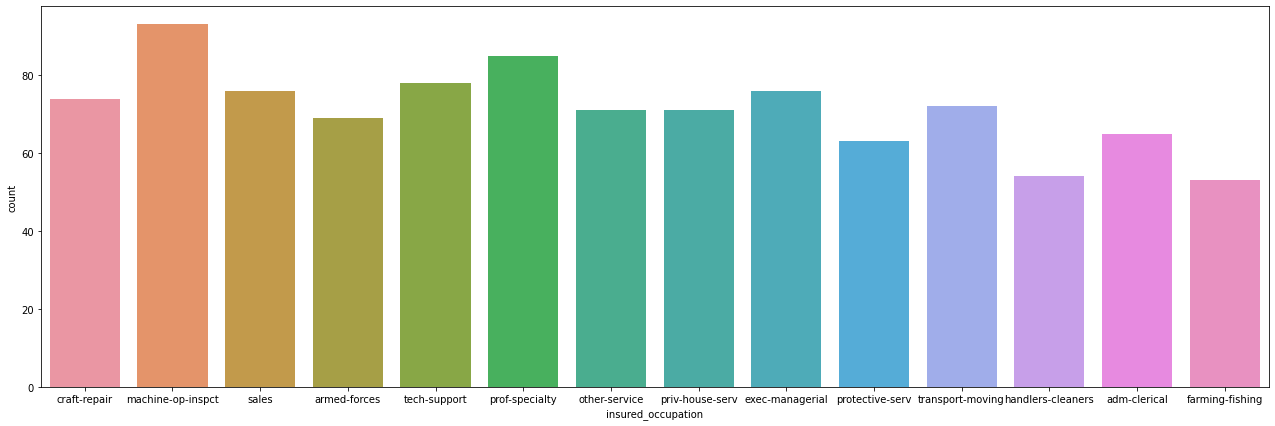

In [20]:
plt.figure(figsize=(22,7))
ax = sn.countplot(x="insured_occupation", data=df)
print(df["insured_occupation"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


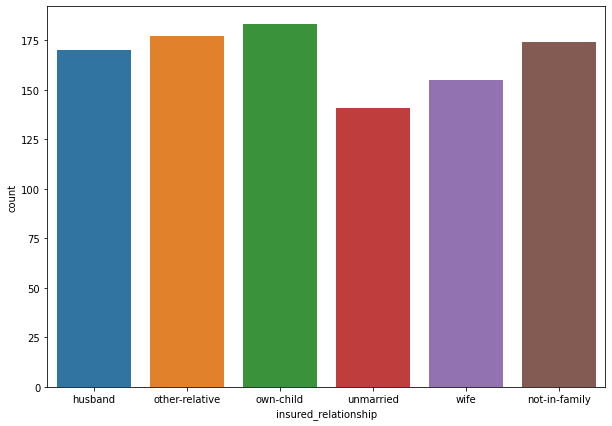

In [23]:
plt.figure(figsize=(10,7))
ax = sn.countplot(x="insured_relationship", data=df)
print(df["insured_relationship"].value_counts())

Total number of insured relationship with husnabd is 170 other relative is 177 own child is 183 unmarried is 141 wife 155 and not in family 174

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


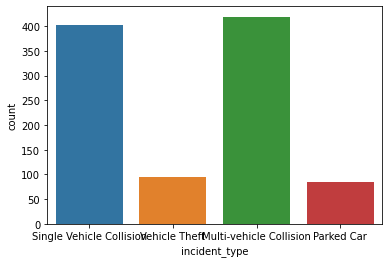

In [25]:
ax = sn.countplot(x="incident_type", data=df)
print(df["incident_type"].value_counts())

total Multi-vehicle Collision  is 419 Single Vehicle Collision is 403 Vehicle Theftis 94, Parked Car is 84

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


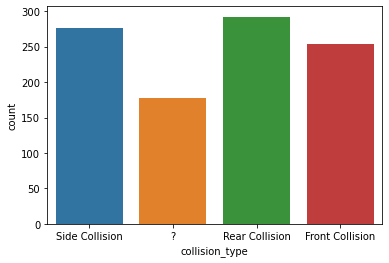

In [26]:
ax = sn.countplot(x="collision_type", data=df)
print(df["collision_type"].value_counts())

Rear collision 292 side collision 276 front collision 254

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


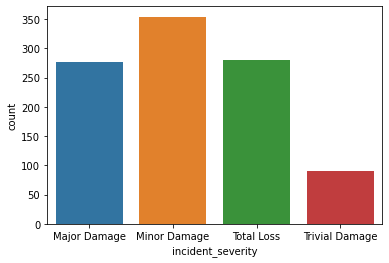

In [27]:
ax = sn.countplot(x="incident_severity", data=df)
print(df["incident_severity"].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


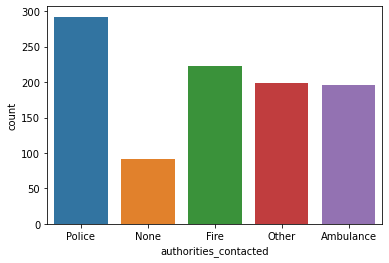

In [28]:
ax = sn.countplot(x="authorities_contacted", data=df)
print(df["authorities_contacted"].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


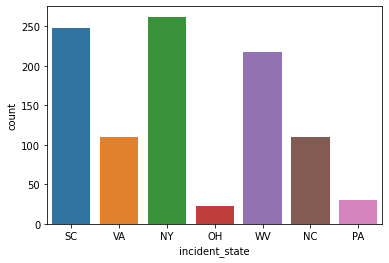

In [29]:
ax = sn.countplot(x="incident_state", data=df)
print(df["incident_state"].value_counts())

Most number of incident occured in Ney York

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


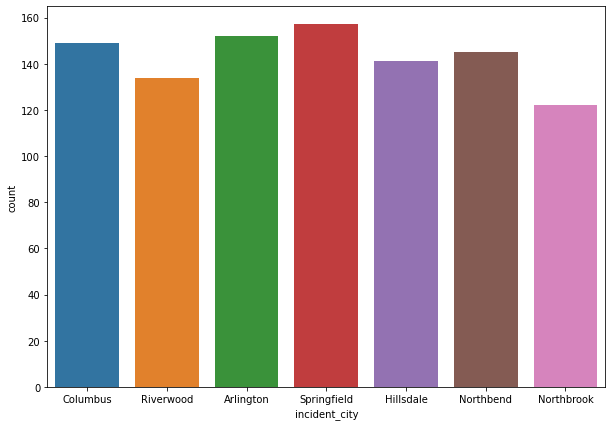

In [32]:
plt.figure(figsize=(10,7))
ax = sn.countplot(x="incident_city", data=df)
print(df["incident_city"].value_counts())

Most number of incident occured in Springfield city

8805 Cherokee Drive      1
3770 Flute Drive         1
6067 Weaver Ridge        1
5649 Texas Ave           1
3422 Flute St            1
                        ..
9422 Washington Ridge    1
1331 Elm Ridge           1
6012 Texas Hwy           1
9685 Sky Ridge           1
7733 Britain Lane        1
Name: incident_location, Length: 1000, dtype: int64


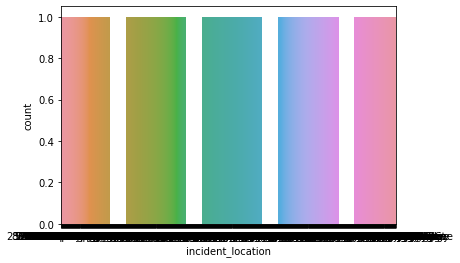

In [31]:
ax = sn.countplot(x="incident_location", data=df)
print(df["incident_location"].value_counts())

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


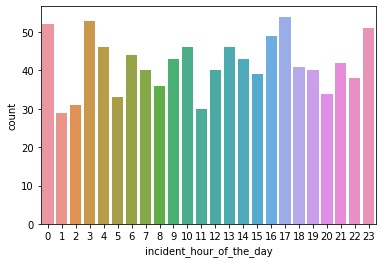

In [33]:
ax = sn.countplot(x="incident_hour_of_the_day", data=df)
print(df["incident_hour_of_the_day"].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


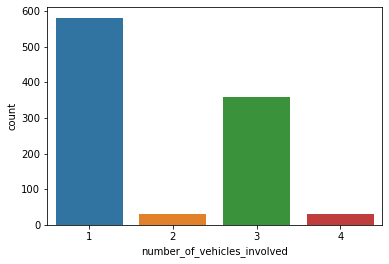

In [34]:
ax = sn.countplot(x="number_of_vehicles_involved", data=df)
print(df["number_of_vehicles_involved"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


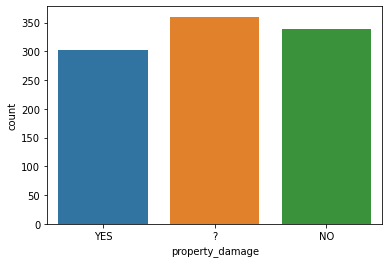

In [35]:
ax = sn.countplot(x="property_damage", data=df)
print(df["property_damage"].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


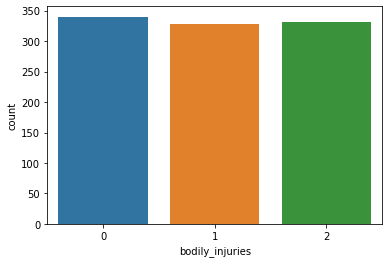

In [36]:
ax = sn.countplot(x="bodily_injuries", data=df)
print(df["bodily_injuries"].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


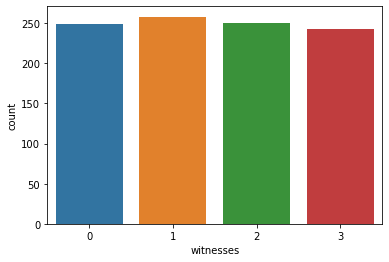

In [37]:
ax = sn.countplot(x="witnesses", data=df)
print(df["witnesses"].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


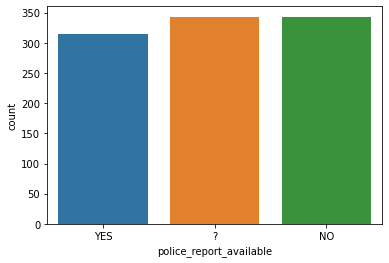

In [38]:
ax = sn.countplot(x="police_report_available", data=df)
print(df["police_report_available"].value_counts())

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c0c2d5d130>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c0c2d5d5e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c0c2d5d1c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c0c2d5d460>}

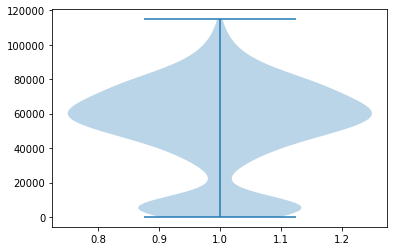

In [39]:
plt.violinplot(df['total_claim_amount'])

Total claim rang is between 20000 to almost 120000 and maximum number of claim is 60000

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c0c0e4e430>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c0c0cf3d30>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c0c0e4e850>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c0c0e4e7c0>}

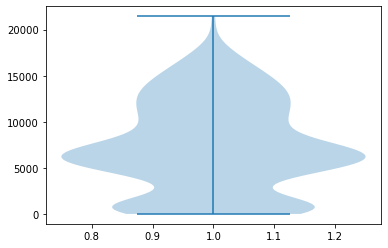

In [40]:
plt.violinplot(df['injury_claim'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c0c1512f10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c0c1363040>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c0c1164760>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c0c11640d0>}

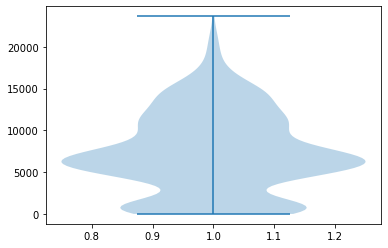

In [41]:
plt.violinplot(df['property_claim'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c0c15fd280>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c0c15fd820>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c0c14cb8e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c0c14cb670>}

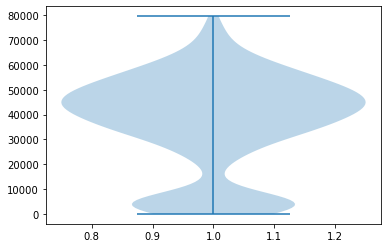

In [42]:
plt.violinplot(df['vehicle_claim'])

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


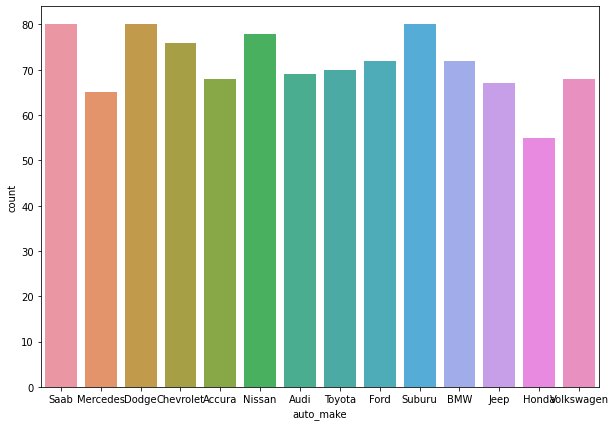

In [44]:
plt.figure(figsize=(10,7))
ax = sn.countplot(x="auto_make", data=df)
print(df["auto_make"].value_counts())

Most number of Incident happened with Saab,Suburu and Dodge company's vehichle

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
E400              27
F150              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Silverado         22
Civic             22
Highlander        22
Fusion            21
Corolla           20
TL                20
ML350             20
CRV               20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


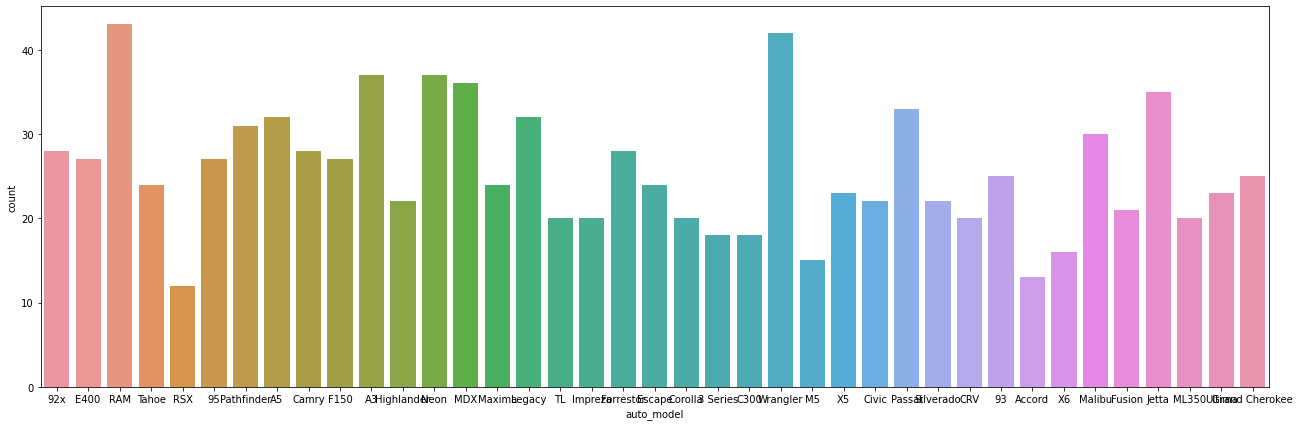

In [46]:
plt.figure(figsize=(22,7))
ax = sn.countplot(x="auto_model", data=df)
print(df["auto_model"].value_counts())

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


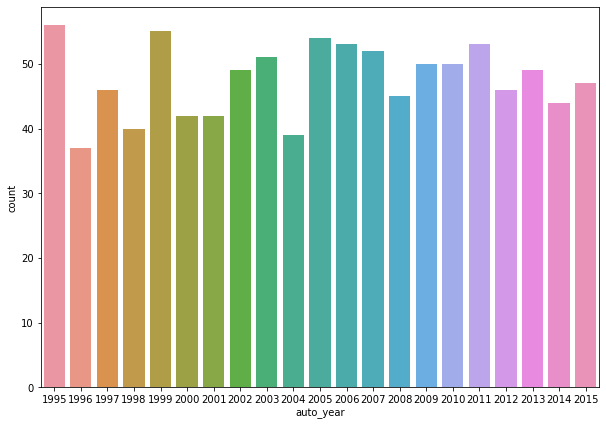

In [47]:
plt.figure(figsize=(10,7))
ax = sn.countplot(x="auto_year", data=df)
print(df["auto_year"].value_counts())

Most of the incident happened in 1995

N    753
Y    247
Name: fraud_reported, dtype: int64


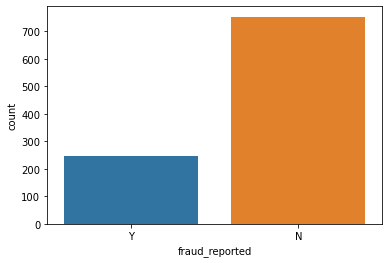

In [48]:

ax = sn.countplot(x="fraud_reported", data=df)
print(df["fraud_reported"].value_counts())

 No Fraud reported is 753 and yes fraud reported is 247

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

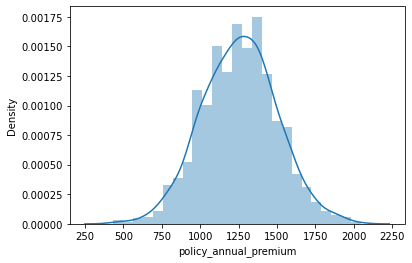

In [50]:
sn.distplot(df['policy_annual_premium'], kde=True)

# Encoding of Dataframe

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lb=LabelEncoder()

In [53]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))

In [54]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [55]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [56]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

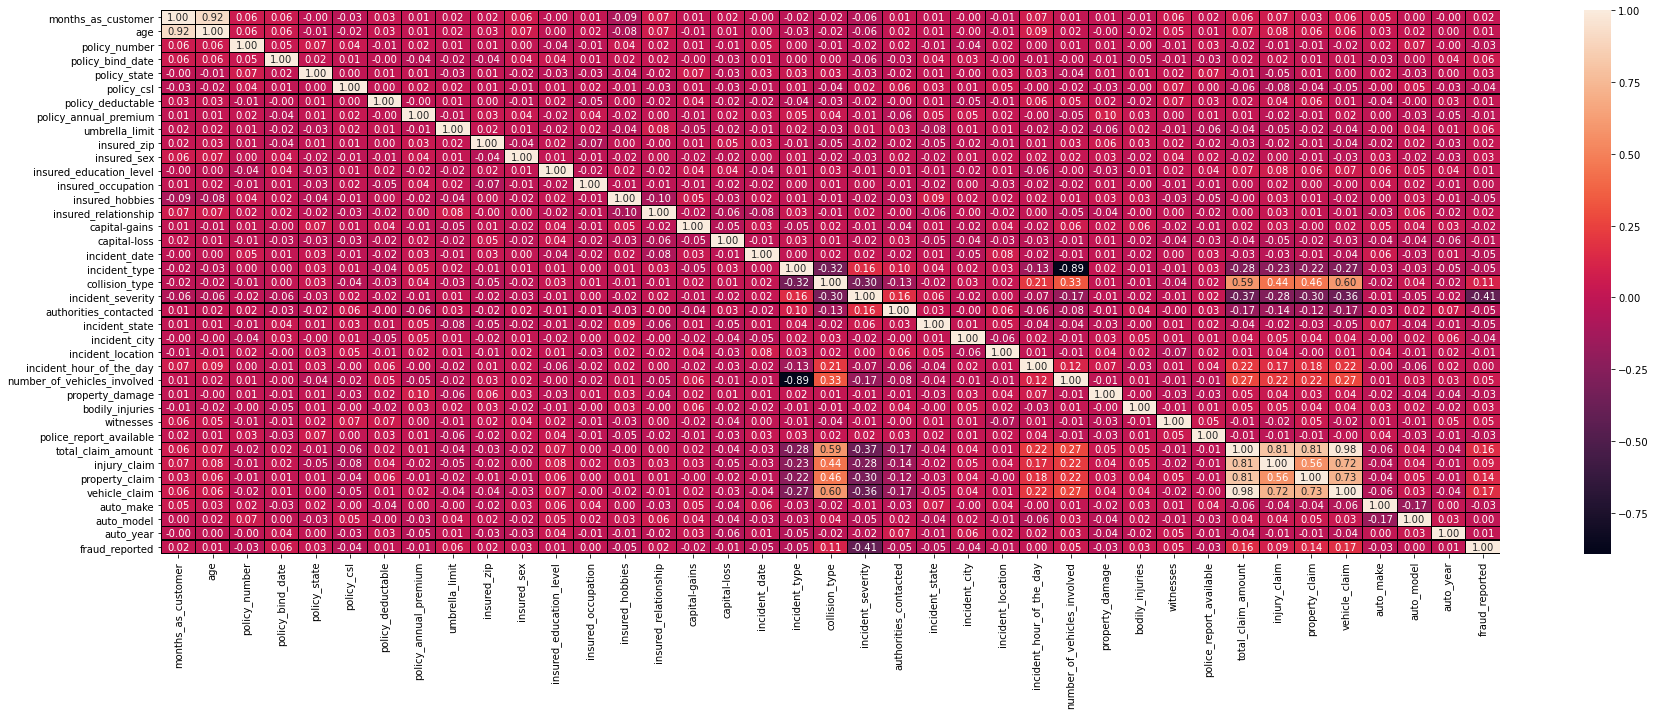

In [59]:
plt.figure(figsize=(30,10))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

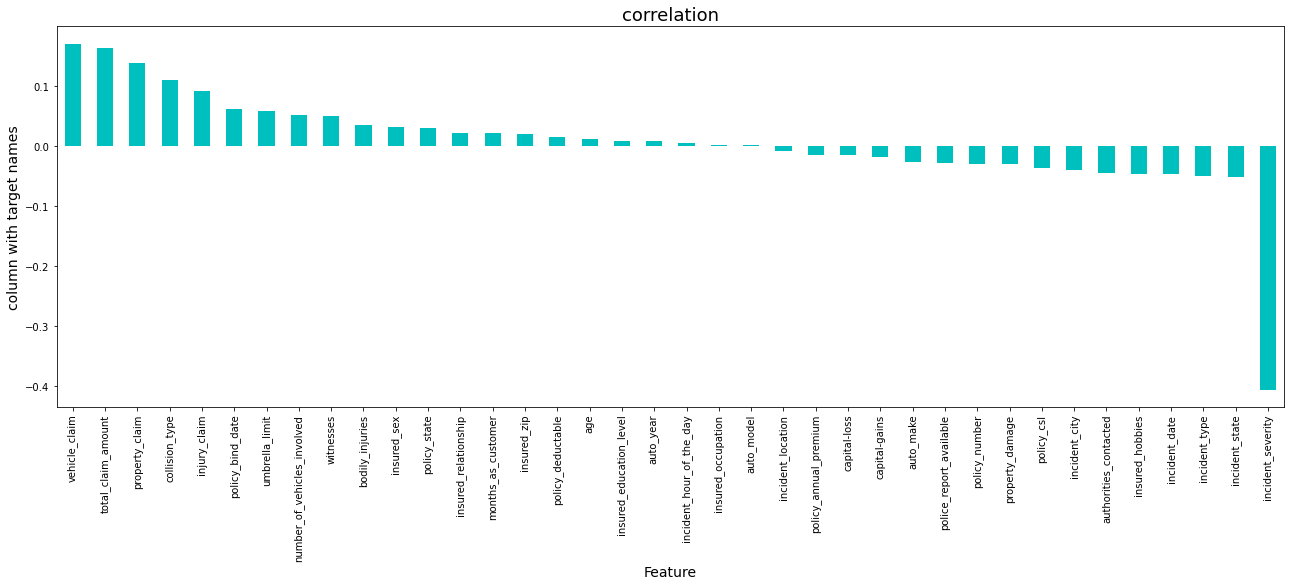

In [60]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [61]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


umbrella_limit - Categorical
insured_zip- Categorical
fraud_reported - Categorical

# Outlier checking

<AxesSubplot:>

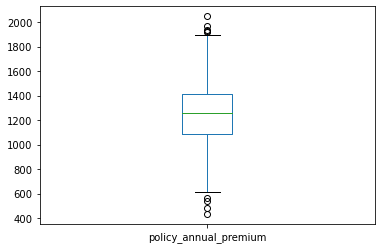

In [62]:
df['policy_annual_premium'].plot.box()

<AxesSubplot:>

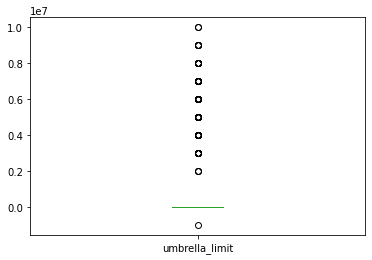

In [63]:
df['umbrella_limit'].plot.box()

<AxesSubplot:>

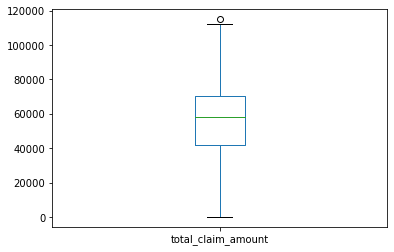

In [64]:
df['total_claim_amount'].plot.box()

<AxesSubplot:>

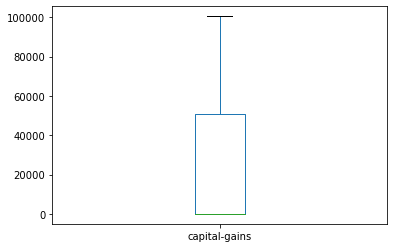

In [65]:
df['capital-gains'].plot.box()

<AxesSubplot:>

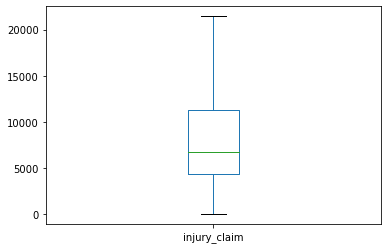

In [66]:
df['injury_claim'].plot.box()

<AxesSubplot:>

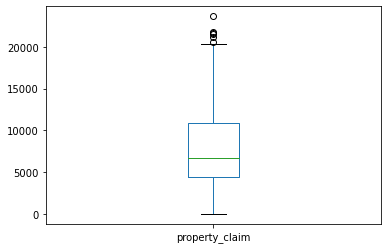

In [67]:
df['property_claim'].plot.box()

<AxesSubplot:>

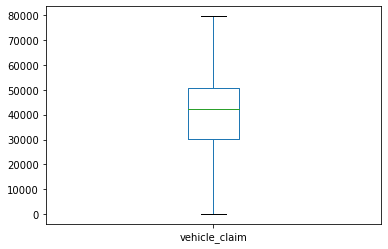

In [69]:
df['vehicle_claim'].plot.box()

# Treating Outliers

In [70]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [71]:
df1=df[(z<3).all(axis=1)]
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [72]:
x=df.iloc[:,:-1]
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009


In [73]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [76]:
x.value_counts()

months_as_customer  age  policy_number  policy_bind_date  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_date  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year
0                   32   740518         546               2             2           1000               1377.040000            0               441363       1            1                        12                  0                5                     61400          -41100        33             0              2               1                  0           

In [77]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.14813044,  1.07036205, -0.07645213, ...,  0.96436534,
        -1.73156844, -0.19282946],
       [ 0.22977244,  0.38006218, -0.78177948, ...,  0.43441307,
        -0.67405092,  0.34001672],
       [-0.63348408, -1.11558754,  0.57913207, ..., -0.62549148,
         1.0564323 ,  0.34001672],
       ...,
       [-0.11002002, -0.31023769, -0.39938003, ..., -1.15544375,
         1.34484617, -0.54806025],
       [-0.9916437 , -1.46073747, -0.05517987, ..., -0.0955392 ,
        -0.86632683, -0.37044485],
       [ 0.39507688,  0.61016214, -1.25361714, ...,  0.6993892 ,
         0.76801843,  0.51763211]])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [79]:
lg=LogisticRegression()

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.829734219269103
At random state 0,the testing accuracy is:- 0.7748344370860927


At random state 1,the training accuracy is:- 0.8313953488372093
At random state 1,the testing accuracy is:- 0.7880794701986755


At random state 2,the training accuracy is:- 0.8313953488372093
At random state 2,the testing accuracy is:- 0.7880794701986755


At random state 3,the training accuracy is:- 0.824750830564784
At random state 3,the testing accuracy is:- 0.8145695364238411


At random state 4,the training accuracy is:- 0.8172757475083057
At random state 4,the testing accuracy is:- 0.8311258278145696


At random state 5,the training accuracy is:- 0.8214285714285714
At random state 5,the testing accuracy is:- 0.8245033112582781


At random state 6,the training accuracy is:- 0.8305647840531561
At random state 6,the testing accuracy is:- 0.8112582781456954


At random state 7,the training accuracy is:- 0.8289036544850499
At random state 7,the testing accur

At random state 65,the testing accuracy is:- 0.7814569536423841


At random state 66,the training accuracy is:- 0.829734219269103
At random state 66,the testing accuracy is:- 0.7980132450331126


At random state 67,the training accuracy is:- 0.8197674418604651
At random state 67,the testing accuracy is:- 0.8013245033112583


At random state 68,the training accuracy is:- 0.8197674418604651
At random state 68,the testing accuracy is:- 0.8178807947019867


At random state 69,the training accuracy is:- 0.8264119601328903
At random state 69,the testing accuracy is:- 0.8145695364238411


At random state 70,the training accuracy is:- 0.8272425249169435
At random state 70,the testing accuracy is:- 0.8278145695364238


At random state 71,the training accuracy is:- 0.8205980066445183
At random state 71,the testing accuracy is:- 0.8609271523178808


At random state 72,the training accuracy is:- 0.8313953488372093
At random state 72,the testing accuracy is:- 0.7781456953642384


At random state 73

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=5)

In [82]:
x_train.shape

(1009, 38)

In [83]:
y_train.shape

(1009,)

In [84]:
x_test.shape

(497, 38)

In [85]:
y_test.shape

(497,)

In [86]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7907444668008048
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       255
           1       0.78      0.80      0.79       242

    accuracy                           0.79       497
   macro avg       0.79      0.79      0.79       497
weighted avg       0.79      0.79      0.79       497



In [87]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8048289738430584
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       255
           1       0.78      0.84      0.81       242

    accuracy                           0.80       497
   macro avg       0.81      0.81      0.80       497
weighted avg       0.81      0.80      0.80       497



In [88]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8430583501006036
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       255
           1       0.87      0.80      0.83       242

    accuracy                           0.84       497
   macro avg       0.85      0.84      0.84       497
weighted avg       0.84      0.84      0.84       497



In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8531187122736419
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       255
           1       0.87      0.83      0.85       242

    accuracy                           0.85       497
   macro avg       0.85      0.85      0.85       497
weighted avg       0.85      0.85      0.85       497



In [90]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.6519114688128773
              precision    recall  f1-score   support

           0       0.91      0.36      0.51       255
           1       0.59      0.96      0.73       242

    accuracy                           0.65       497
   macro avg       0.75      0.66      0.62       497
weighted avg       0.75      0.65      0.62       497



# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.7995511649908693


In [95]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.81215154782073


In [96]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8619766341774658


In [97]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.832131306241887


In [98]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.6852786517348354


# AUC ROC Curve

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [100]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.74, 0.21, 0.96, 0.24, 0.13, 0.92, 0.8 , 0.82, 0.67, 0.86, 0.62,
       0.69, 0.28, 0.94, 0.56, 0.82, 0.88, 0.22, 0.98, 0.97, 0.6 , 0.29,
       0.19, 0.28, 0.81, 0.29, 0.94, 0.21, 0.31, 0.93, 0.69, 0.22, 0.83,
       0.16, 0.23, 0.63, 0.86, 0.47, 0.93, 0.97, 0.32, 0.81, 0.94, 0.13,
       0.22, 0.96, 0.2 , 0.25, 0.17, 0.84, 0.37, 0.54, 0.12, 0.41, 0.23,
       0.83, 0.34, 0.17, 0.27, 0.26, 0.88, 0.28, 0.53, 0.92, 0.16, 0.45,
       0.96, 0.7 , 0.21, 0.92, 0.28, 0.42, 0.26, 0.17, 0.95, 0.7 , 0.82,
       0.25, 0.19, 0.34, 0.41, 0.65, 0.33, 0.52, 0.22, 0.26, 0.14, 0.12,
       0.99, 0.49, 0.69, 0.93, 0.88, 0.22, 0.15, 0.92, 0.96, 0.24, 0.94,
       0.6 , 0.23, 0.41, 0.88, 0.36, 0.35, 0.89, 0.4 , 0.92, 0.56, 0.52,
       0.83, 0.59, 0.8 , 0.68, 0.51, 0.65, 0.63, 0.97, 0.58, 0.65, 0.61,
       0.92, 0.25, 0.35, 0.86, 0.19, 0.4 , 0.56, 0.29, 0.27, 0.25, 0.8 ,
       0.92, 0.13, 0.31, 0.25, 0.25, 0.62, 0.89, 0.3 , 0.18, 0.23, 0.92,
       0.23, 0.64, 0.27, 0.27, 0.28, 0.65, 0.66, 0.

In [101]:
y_pred_prob.shape

(497,)

In [102]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [103]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.00392157, 0.00392157,
       0.00784314, 0.00784314, 0.01176471, 0.01176471, 0.01568627,
       0.01568627, 0.02745098, 0.03529412, 0.03921569, 0.03921569,
       0.03921569, 0.04313725, 0.05098039, 0.05490196, 0.05882353,
       0.0627451 , 0.0745098 , 0.08235294, 0.09019608, 0.09019608,
       0.09803922, 0.10196078, 0.10196078, 0.10980392, 0.10980392,
       0.11372549, 0.12156863, 0.1254902 , 0.13333333, 0.1372549 ,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.16078431,
       0.16862745, 0.18039216, 0.18823529, 0.20392157, 0.20784314,
       0.21960784, 0.23921569, 0.25490196, 0.3254902 , 0.36470588,
       0.4       , 0.43137255, 0.4627451 , 0.49411765, 0.56078431,
       0.60784314, 0.6627451 , 0.70980392, 0.75294118, 0.77647

In [104]:
tpr

array([0.        , 0.00826446, 0.01652893, 0.08264463, 0.10330579,
       0.15289256, 0.2107438 , 0.2231405 , 0.24793388, 0.29338843,
       0.32644628, 0.34710744, 0.37190083, 0.38016529, 0.41322314,
       0.4338843 , 0.46280992, 0.48347107, 0.5       , 0.51239669,
       0.53305785, 0.53719008, 0.55785124, 0.5661157 , 0.57024793,
       0.57438017, 0.5785124 , 0.60330579, 0.62809917, 0.6446281 ,
       0.65702479, 0.67768595, 0.69421488, 0.70247934, 0.71487603,
       0.7231405 , 0.73140496, 0.75619835, 0.76033058, 0.76859504,
       0.7768595 , 0.78512397, 0.7892562 , 0.80165289, 0.80991736,
       0.81818182, 0.82644628, 0.82644628, 0.83057851, 0.83057851,
       0.84710744, 0.85123967, 0.87190083, 0.87603306, 0.88429752,
       0.89256198, 0.90909091, 0.91735537, 0.92975207, 0.94214876,
       0.94628099, 0.95041322, 0.95454545, 0.95454545, 0.95867769,
       0.95867769, 0.97107438, 0.97520661, 0.97520661, 0.98347107,
       0.98347107, 0.98347107, 0.98760331, 0.98760331, 0.99173

In [105]:
thresholds

array([1.99, 0.99, 0.98, 0.96, 0.95, 0.93, 0.92, 0.91, 0.89, 0.88, 0.87,
       0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66, 0.65,
       0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56, 0.55, 0.54,
       0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.42,
       0.41, 0.4 , 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.31, 0.3 , 0.29,
       0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18,
       0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.02])

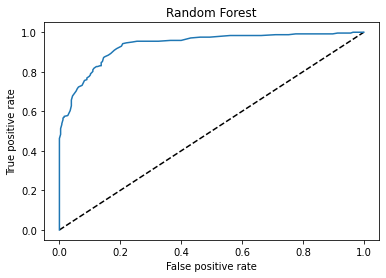

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [107]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [108]:
auc_score

0.8524388267703775

# Hyper Parameter Tuning

In [109]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features':['auto', 'sqrt']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [113]:
rf=RandomForestClassifier(n_estimators=800,max_depth=30,criterion='gini',min_samples_split=5,min_samples_leaf=4,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8350100603621731
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       255
           1       0.84      0.81      0.83       242

    accuracy                           0.84       497
   macro avg       0.84      0.83      0.83       497
weighted avg       0.84      0.84      0.83       497



# Saving Model

In [114]:
import pickle
filename = 'Insurance_fraud.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [115]:
loaded_model = pickle.load(open('Insurance_fraud.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8350100603621731
